<a href="https://colab.research.google.com/github/sjalg5/Machine-Learning-Basic-Projects/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sanjana Jalgaonkar   
Semester-4   
Section-C   
Roll number-6   

Decision Tree   
Data set- wines

Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

Importing file:

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving wines.csv to wines (1).csv


In [ ]:
import io 
dataset = pd.read_csv(io.BytesIO(uploaded['wines.csv']))
dataset.head()

,pH,volatile acidity,alcohol,quality
0,3.51,0.70,9.4,Normal
1,3.20,0.88,9.8,Normal
2,3.26,0.76,9.8,Normal
3,3.16,0.28,9.8,Okay
4,3.51,0.70,9.4,Normal


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pH                99 non-null     float64
 1   volatile acidity  99 non-null     float64
 2   alcohol           99 non-null     float64
 3   quality           99 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
dataset.shape

(99, 4)

In [ ]:
dataset.isnull().any()

pH                  False
volatile acidity    False
alcohol             False
quality             False
dtype: bool

In [ ]:
target = dataset['quality']
dataset1 = dataset.copy()
dataset1 = dataset1.drop('quality', axis =1)

In [ ]:
# Defining the attributes
X = dataset1

In [ ]:
target

0     Normal
1     Normal
2     Normal
3       Okay
4     Normal
       ...  
94       Bad
95      Okay
96    Normal
97    Normal
98    Normal
Name: quality, Length: 99, dtype: object

In [ ]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 1, 0, 2, 2, 0, 3, 2,
       2, 0, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 0, 3, 2, 2, 2])

In [ ]:
y = target

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (79, 3)
Testing split input-  (20, 3)


In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.71      0.77      0.74        13
           3       0.33      0.25      0.29         4

    accuracy                           0.60        20
   macro avg       0.51      0.50      0.51        20
weighted avg       0.58      0.60      0.59        20



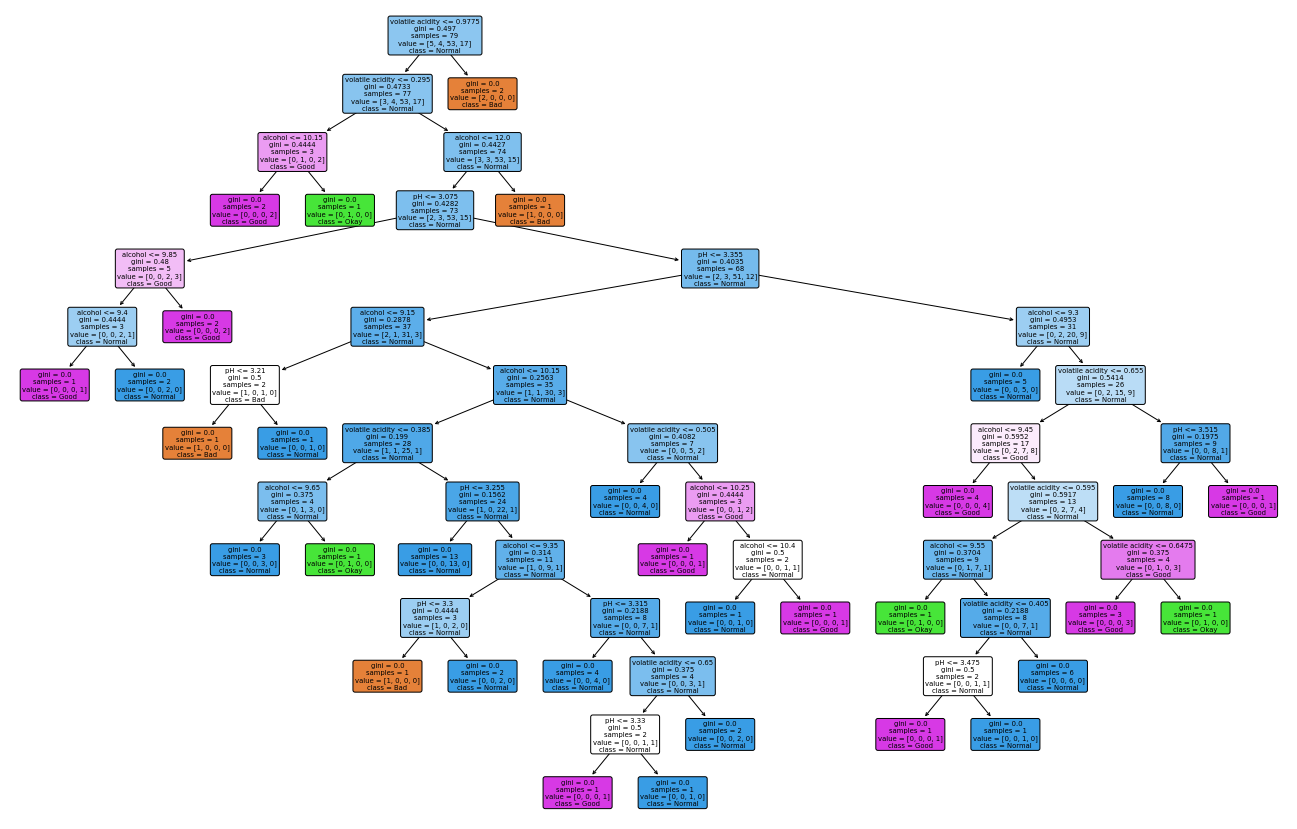

In [ ]:
# Visualising the graph without the use of graphviz
plt.figure(figsize = (23,15))
dec_tree = plot_tree(decision_tree=dtree, feature_names = dataset1.columns, 
                     class_names =["Bad", "Okay", "Normal", "Good"] , filled = True ,
                     precision = 4, rounded = True)